In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train.csv

### 기본적인 정보 확인

In [2]:
df = pd.read_csv("../../../../estsoft/data/train.csv")

In [51]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [52]:
df.tail()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60
2018351,15,1,3,196.240,1,2023-05-31 23:00:00,637,2018351,60


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [90]:
df.describe()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2018352,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,2022-07-20 08:29:25.326166016,3.218746e+02,1.009176e+06,3.304538e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2021-09-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,2022-02-14 04:00:00,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,2022-07-21 09:30:00,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,2022-12-24 14:00:00,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,2023-05-31 23:00:00,6.370000e+02,2.018351e+06,6.800000e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,NaN,1.826343e+02,5.826482e+05,1.959059e+01


In [54]:
df.isnull().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [57]:
df_prod =df[df['is_consumption']==0]
df_prod.isnull().sum()

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [58]:
df_cons = df[df['is_consumption']==1]
df_cons.isnull().sum()

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [56]:
df_null = df[df.isnull().any(axis=1)]
df_null['datetime'].value_counts()

datetime
2022-10-30 03:00:00    136
2022-03-27 03:00:00    134
2023-03-26 03:00:00    132
2021-10-31 03:00:00    126
Name: count, dtype: int64

- 특정 날짜의 03시에만 null값이 있음

In [88]:
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [59]:
df[df['datetime']=="2022-03-27 03:00:00"]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
634866,0,0,1,NaN,0,2022-03-27 03:00:00,207,634866,0
634867,0,0,1,NaN,1,2022-03-27 03:00:00,207,634867,0
634868,0,0,2,NaN,0,2022-03-27 03:00:00,207,634868,1
634869,0,0,2,NaN,1,2022-03-27 03:00:00,207,634869,1
634870,0,0,3,NaN,0,2022-03-27 03:00:00,207,634870,2
...,...,...,...,...,...,...,...,...,...
634995,15,1,0,NaN,1,2022-03-27 03:00:00,207,634995,64
634996,15,1,1,NaN,0,2022-03-27 03:00:00,207,634996,59
634997,15,1,1,NaN,1,2022-03-27 03:00:00,207,634997,59
634998,15,1,3,NaN,0,2022-03-27 03:00:00,207,634998,60


In [60]:
df[df['datetime']=="2022-10-30 02:00:00"]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1332320,0,0,1,0.000,0,2022-10-30 02:00:00,424,1332320,0
1332321,0,0,1,490.487,1,2022-10-30 02:00:00,424,1332321,0
1332322,0,0,2,0.000,0,2022-10-30 02:00:00,424,1332322,1
1332323,0,0,2,24.104,1,2022-10-30 02:00:00,424,1332323,1
1332324,0,0,3,0.109,0,2022-10-30 02:00:00,424,1332324,2
...,...,...,...,...,...,...,...,...,...
1332451,15,1,0,186.505,1,2022-10-30 02:00:00,424,1332451,64
1332452,15,1,1,0.000,0,2022-10-30 02:00:00,424,1332452,59
1332453,15,1,1,31.650,1,2022-10-30 02:00:00,424,1332453,59
1332454,15,1,3,0.028,0,2022-10-30 02:00:00,424,1332454,60


In [89]:
df[df['datetime']=="2022-10-30 04:00:00"]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1332592,0,0,1,0.004,0,2022-10-30 04:00:00,424,1332592,0
1332593,0,0,1,470.472,1,2022-10-30 04:00:00,424,1332593,0
1332594,0,0,2,0.000,0,2022-10-30 04:00:00,424,1332594,1
1332595,0,0,2,24.548,1,2022-10-30 04:00:00,424,1332595,1
1332596,0,0,3,1.534,0,2022-10-30 04:00:00,424,1332596,2
...,...,...,...,...,...,...,...,...,...
1332723,15,1,0,193.844,1,2022-10-30 04:00:00,424,1332723,64
1332724,15,1,1,0.000,0,2022-10-30 04:00:00,424,1332724,59
1332725,15,1,1,33.521,1,2022-10-30 04:00:00,424,1332725,59
1332726,15,1,3,0.025,0,2022-10-30 04:00:00,424,1332726,60


In [61]:
df['prediction_unit_id'].value_counts()

prediction_unit_id
0     30624
46    30624
32    30624
33    30624
1     30624
      ...  
47    24000
67    23280
26    19968
41    12144
68     3312
Name: count, Length: 69, dtype: int64

In [63]:
df['data_block_id'].value_counts()

data_block_id
452    3312
450    3312
436    3312
437    3312
438    3312
       ... 
26     2928
27     2928
28     2928
29     2928
0      2928
Name: count, Length: 638, dtype: int64

### 인덱스 변경

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [65]:
# df.index = df['datetime']
# df.index

### categorical column의 데이터 분포 확인

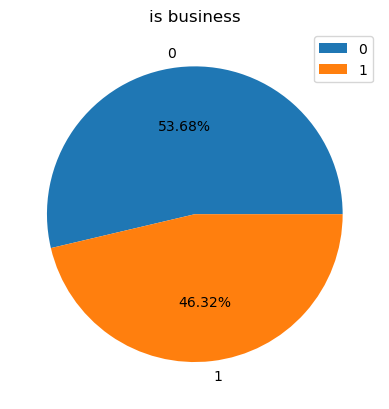

In [66]:
plt.pie(df['is_business'].value_counts(), labels=df['is_business'].unique(), autopct='%.2f%%')
plt.title('is business')
plt.legend()

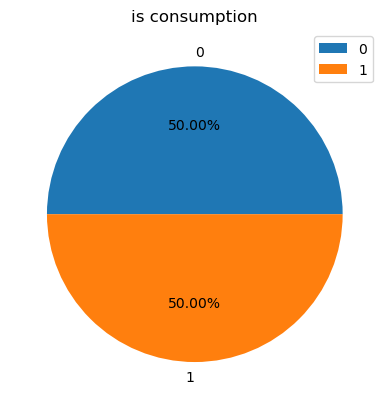

In [67]:
plt.pie(df['is_consumption'].value_counts(), labels=df['is_consumption'].unique(), autopct='%.2f%%')
plt.title('is consumption')
plt.legend()

In [68]:
df[df['is_consumption']==0].head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
4,0,0,3,2.904,0,2021-09-01,0,4,2
6,0,1,0,0.000,0,2021-09-01,0,6,3
8,0,1,1,0.000,0,2021-09-01,0,8,4


In [69]:
df[df['is_consumption']==1].head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1,0,0,1,96.590,1,2021-09-01,0,1,0
3,0,0,2,17.314,1,2021-09-01,0,3,1
5,0,0,3,656.859,1,2021-09-01,0,5,2
7,0,1,0,59.000,1,2021-09-01,0,7,3
9,0,1,1,501.760,1,2021-09-01,0,9,4


- 소비량 예측 모델, 생산량 예측 모델 따로 만들어서 예측

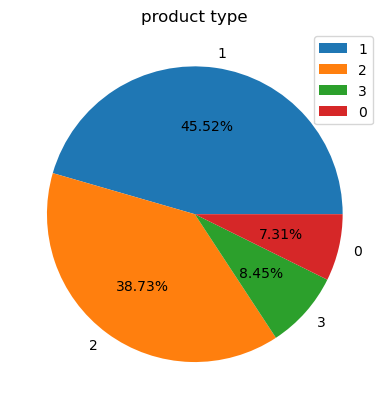

In [70]:
plt.pie(df['product_type'].value_counts(), labels=df['product_type'].unique(), autopct='%.2f%%')
plt.title('product type')
plt.legend()

- prediction_unit_id
    - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

Text(0.5, 1.0, 'prediction_unit_id')

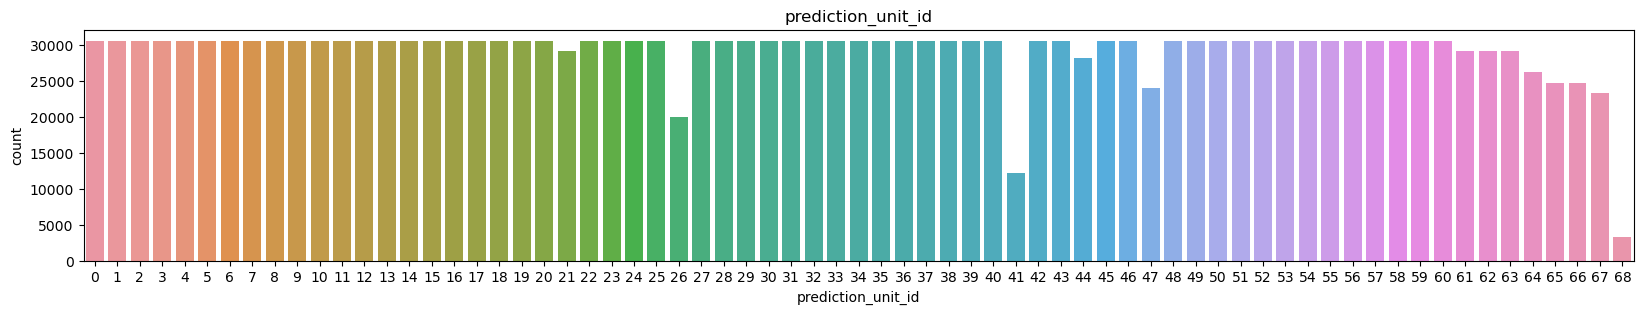

In [71]:
plt.figure(figsize=(20,3))
sns.countplot(x='prediction_unit_id', data=df)
plt.title('prediction_unit_id')

In [72]:
df.head(139)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
134,1,0,1,0.000,0,2021-09-01 01:00:00,0,134,6
135,1,0,1,2.808,1,2021-09-01 01:00:00,0,135,6
136,1,0,3,0.091,0,2021-09-01 01:00:00,0,136,7
137,1,0,3,21.158,1,2021-09-01 01:00:00,0,137,7


In [73]:
df[df['data_block_id']==634]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2005872,0,0,1,3.401,0,2023-05-28 00:00:00,634,2005872,0
2005873,0,0,1,618.661,1,2023-05-28 00:00:00,634,2005873,0
2005874,0,0,2,0.000,0,2023-05-28 00:00:00,634,2005874,1
2005875,0,0,2,4.507,1,2023-05-28 00:00:00,634,2005875,1
2005876,0,0,3,15.918,0,2023-05-28 00:00:00,634,2005876,2
...,...,...,...,...,...,...,...,...,...
2008987,15,1,0,173.048,1,2023-05-28 23:00:00,634,2008987,64
2008988,15,1,1,0.000,0,2023-05-28 23:00:00,634,2008988,59
2008989,15,1,1,35.217,1,2023-05-28 23:00:00,634,2008989,59
2008990,15,1,3,0.000,0,2023-05-28 23:00:00,634,2008990,60


Text(0.5, 1.0, 'county')

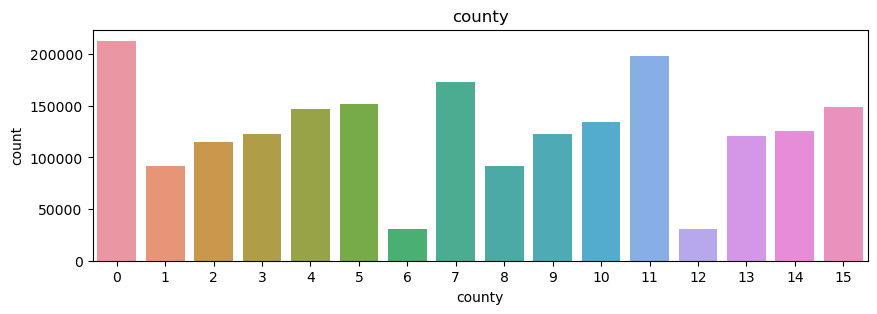

In [85]:
plt.figure(figsize=(10,3))
sns.countplot(x='county', data=df)
plt.title('county')

- 데이터 불균형
    - production_type 
    - county

### 에너지 생산량

In [75]:
# 총생산량
production = df[df['is_consumption']==0]
total = production.groupby('datetime')['target'].sum()
total

datetime
2021-09-01 00:00:00        4.362
2021-09-01 01:00:00       11.852
2021-09-01 02:00:00        1.845
2021-09-01 03:00:00        1.517
2021-09-01 04:00:00        2.492
                         ...    
2023-05-31 19:00:00    11330.989
2023-05-31 20:00:00     4214.015
2023-05-31 21:00:00      856.600
2023-05-31 22:00:00      140.687
2023-05-31 23:00:00      505.379
Name: target, Length: 15312, dtype: float64

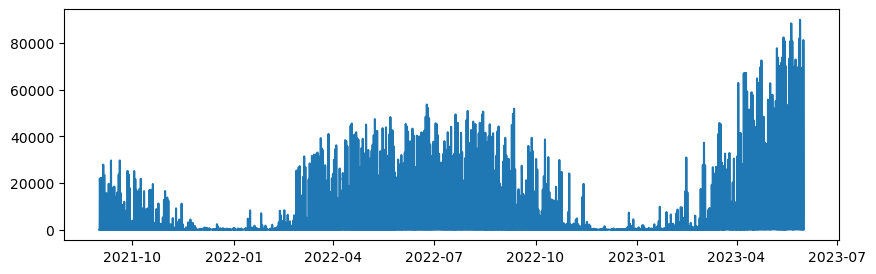

In [76]:
plt.figure(figsize=(10,3))
plt.plot(total)

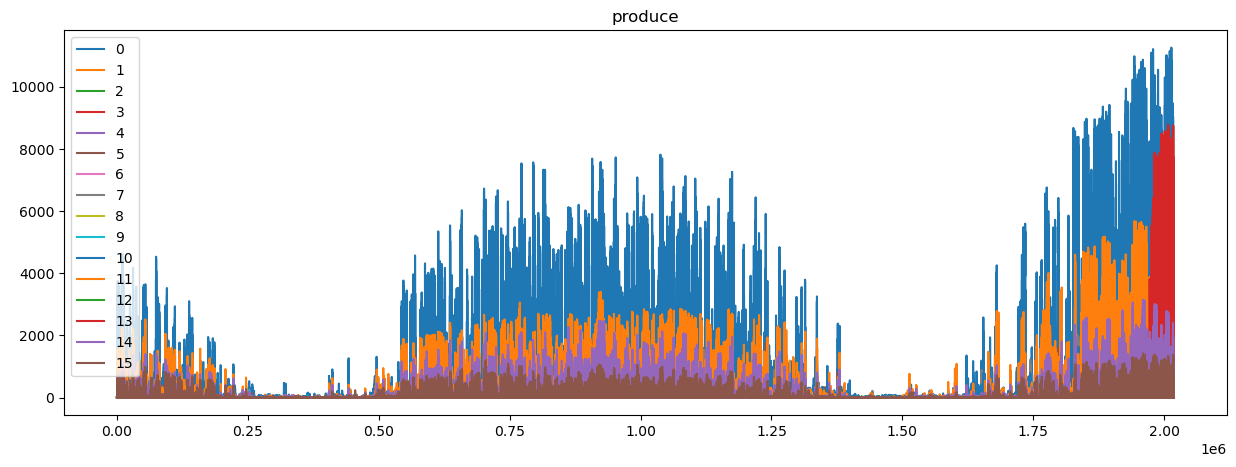

In [77]:
# county별 생산량 비교
df_produce = df[df['is_consumption']==0]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_produce[df_produce['county']==i]['target'], label=i)
plt.title('produce')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


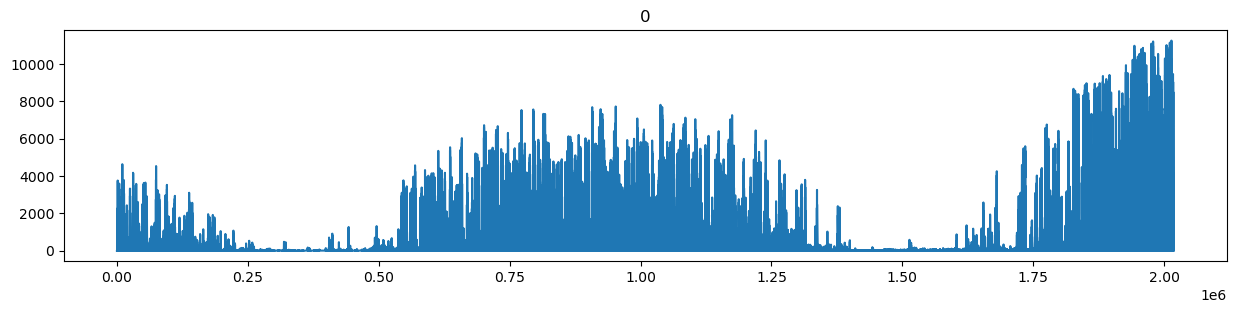

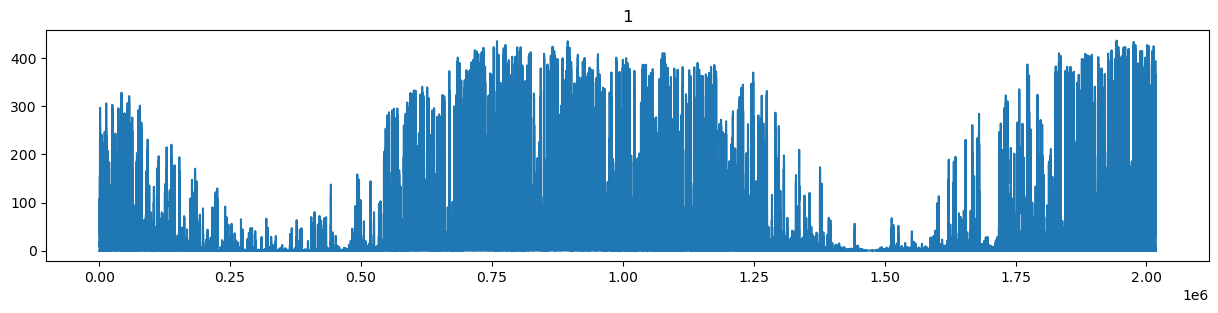

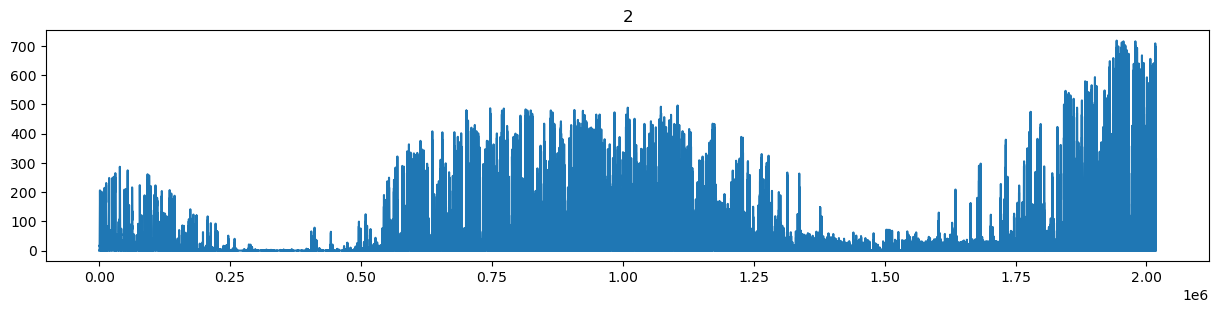

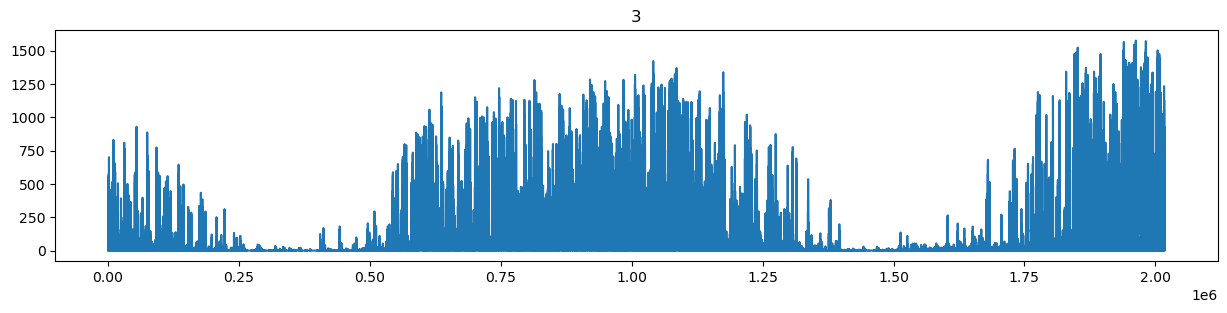

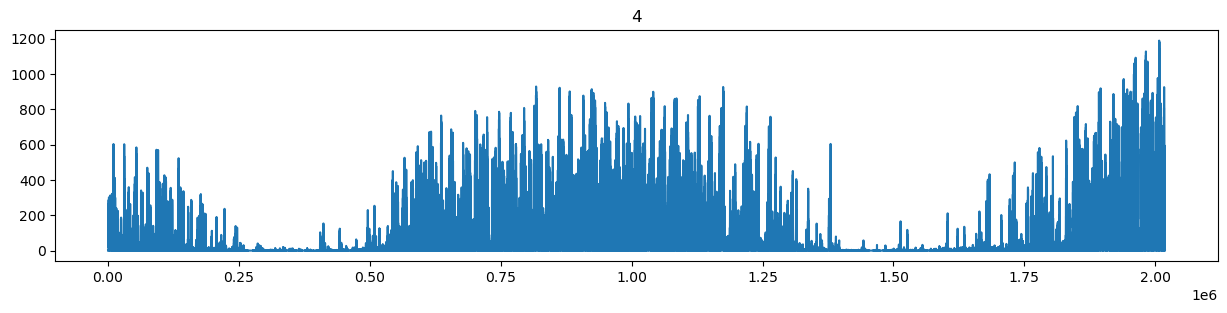

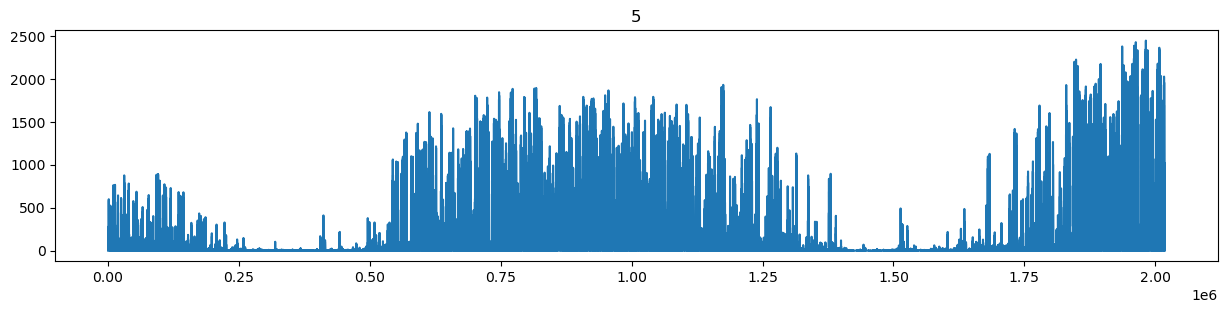

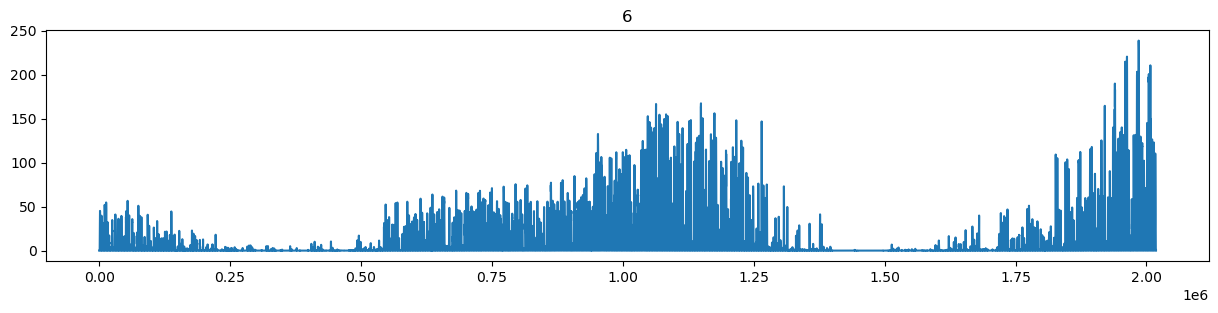

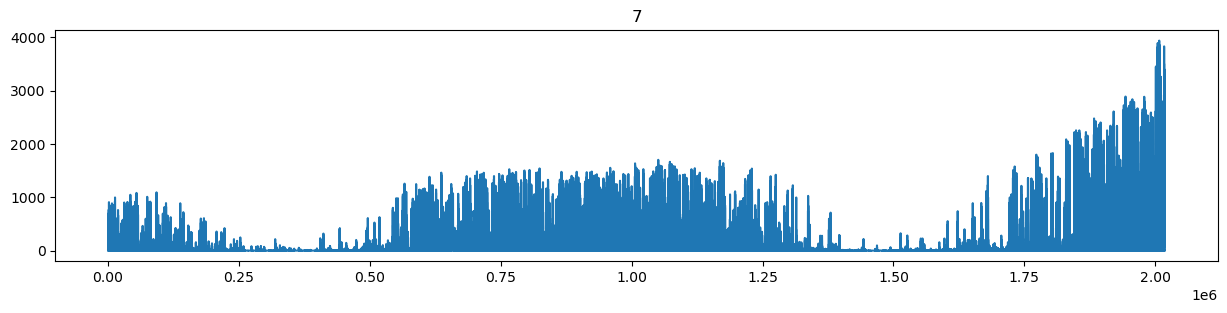

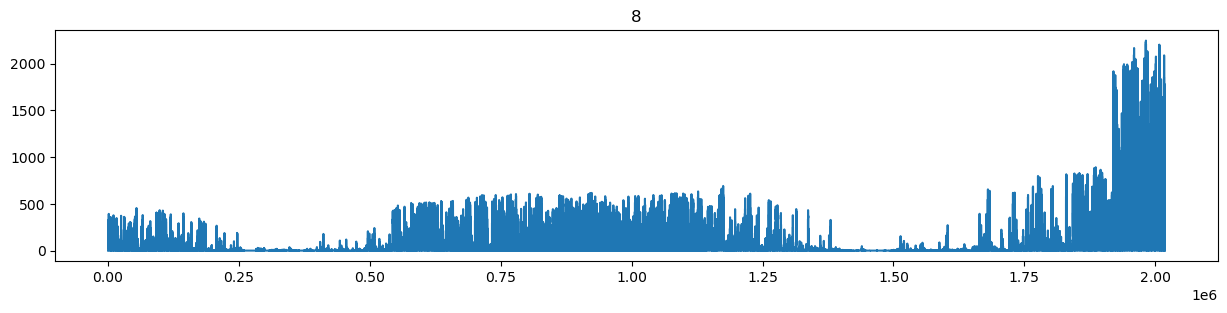

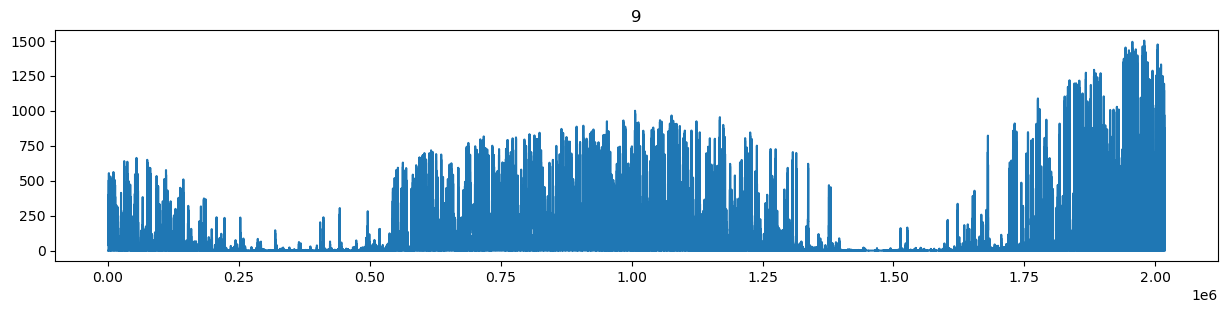

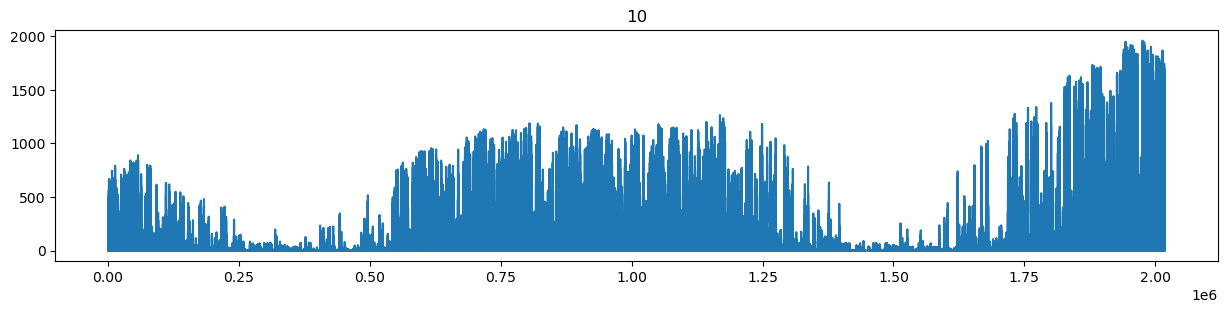

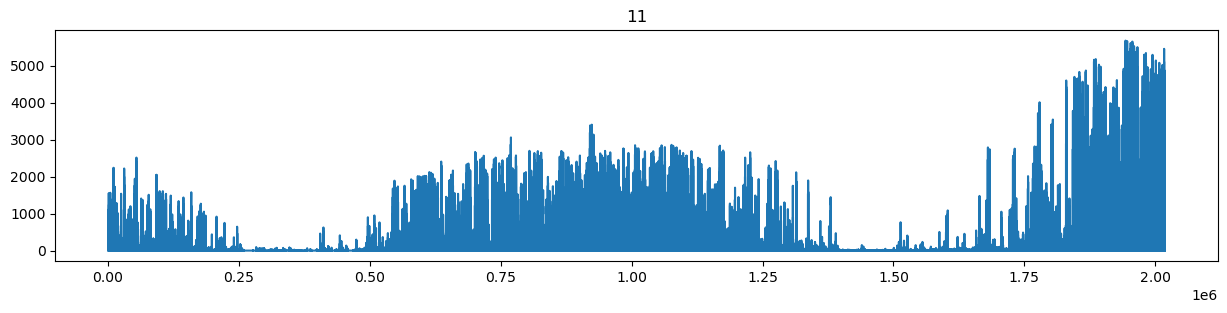

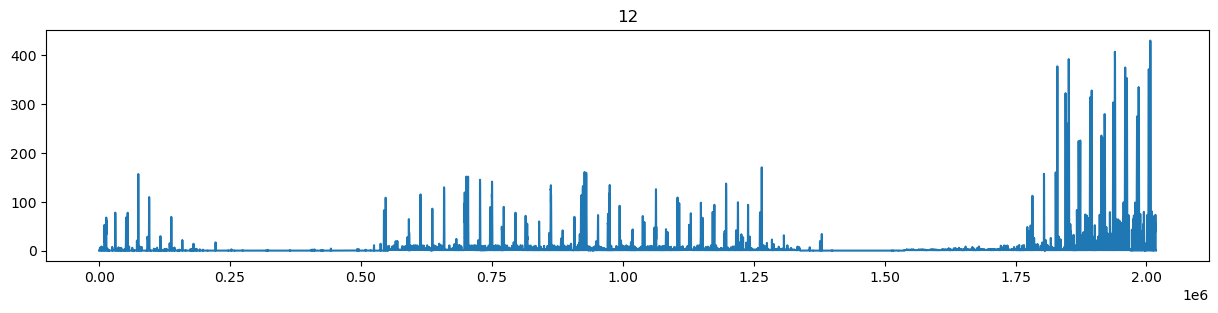

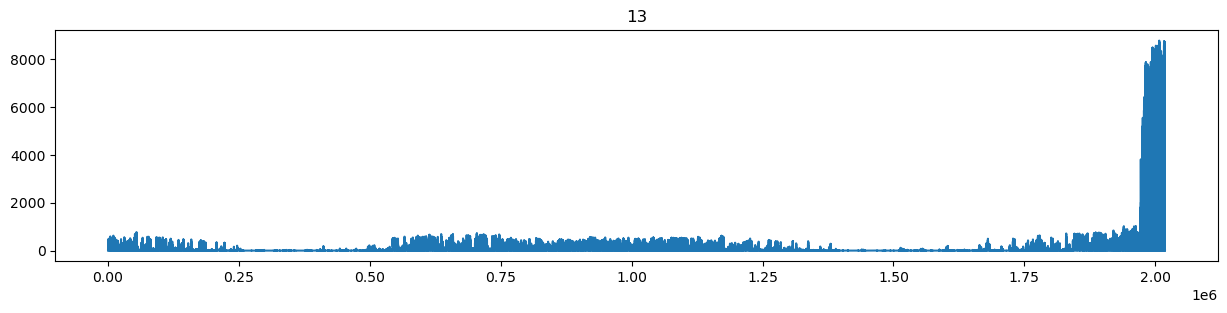

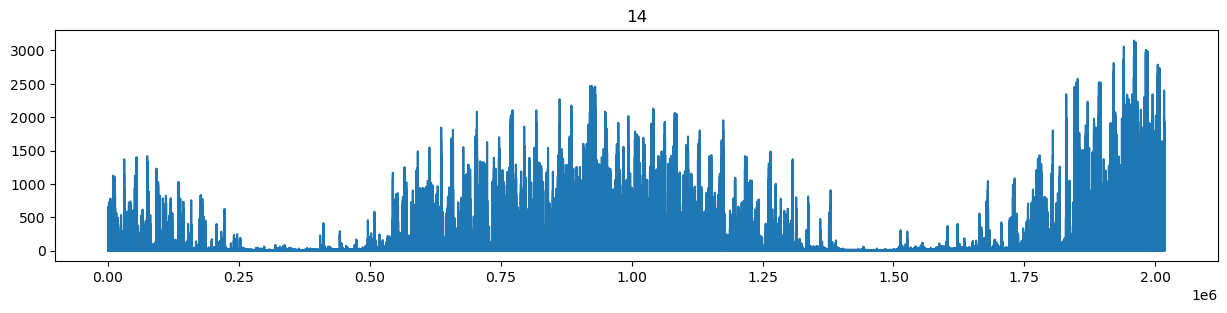

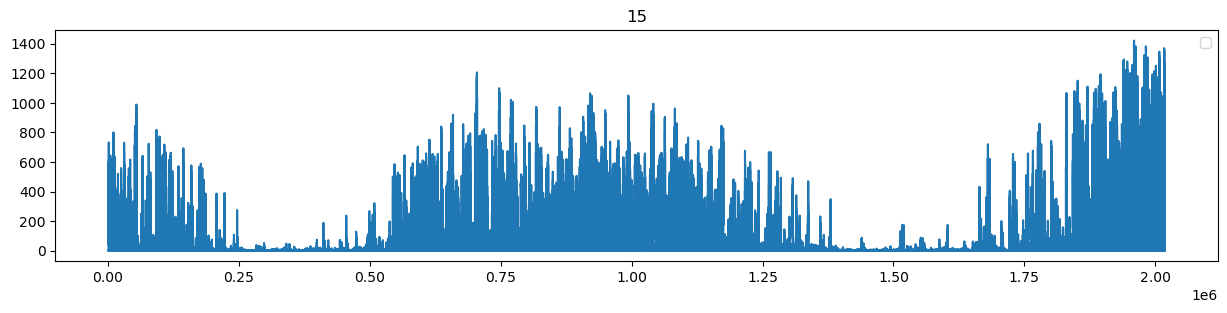

In [78]:
# county별로 살펴보기
df_produce = df[df['is_consumption']==0]
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_produce[df_produce['county']==i]['target'])
    plt.title(i)
plt.legend()

In [79]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_produce[df_produce['target']==0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2,0,0,2,0.0,0,2021-09-01 00:00:00,0,2,1
6,0,1,0,0.0,0,2021-09-01 00:00:00,0,6,3
8,0,1,1,0.0,0,2021-09-01 00:00:00,0,8,4
12,1,0,1,0.0,0,2021-09-01 00:00:00,0,12,6
16,1,1,3,0.0,0,2021-09-01 00:00:00,0,16,8
...,...,...,...,...,...,...,...,...,...
2018336,14,1,1,0.0,0,2023-05-31 23:00:00,637,2018336,55
2018338,14,1,2,0.0,0,2023-05-31 23:00:00,637,2018338,68
2018346,15,1,0,0.0,0,2023-05-31 23:00:00,637,2018346,64
2018348,15,1,1,0.0,0,2023-05-31 23:00:00,637,2018348,59


In [ ]:
# prediction_unit_id별로 살펴보기
df_produce = df[df['is_consumption']==0]
for i in range(len(df['prediction_unit_id'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_produce[df_produce['prediction_unit_id']==i]['target'])
    plt.title(i)
plt.legend()

### 에너지 소비량

In [80]:
# 총소비량
production = df[df['is_consumption']==1]
total = production.groupby('datetime')['target'].sum()
total

datetime
2021-09-01 00:00:00    19859.808
2021-09-01 01:00:00    19265.078
2021-09-01 02:00:00    19260.892
2021-09-01 03:00:00    19026.484
2021-09-01 04:00:00    19367.124
                         ...    
2023-05-31 19:00:00    28058.709
2023-05-31 20:00:00    30832.105
2023-05-31 21:00:00    32601.387
2023-05-31 22:00:00    32070.928
2023-05-31 23:00:00    29070.312
Name: target, Length: 15312, dtype: float64

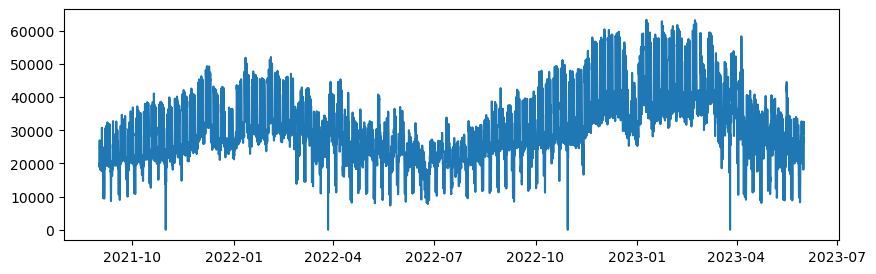

In [81]:
plt.figure(figsize=(10,3))
plt.plot(total)

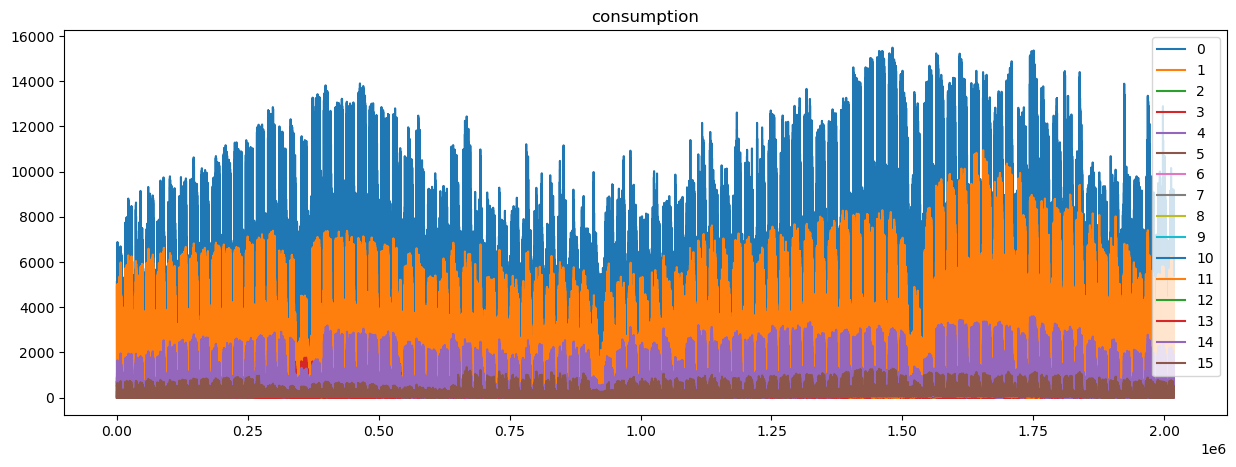

In [82]:
# county별 소비량 비교
df_consumption = df[df['is_consumption']==1]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_consumption[df_consumption['county']==i]['target'], label=i)
plt.title('consumption')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


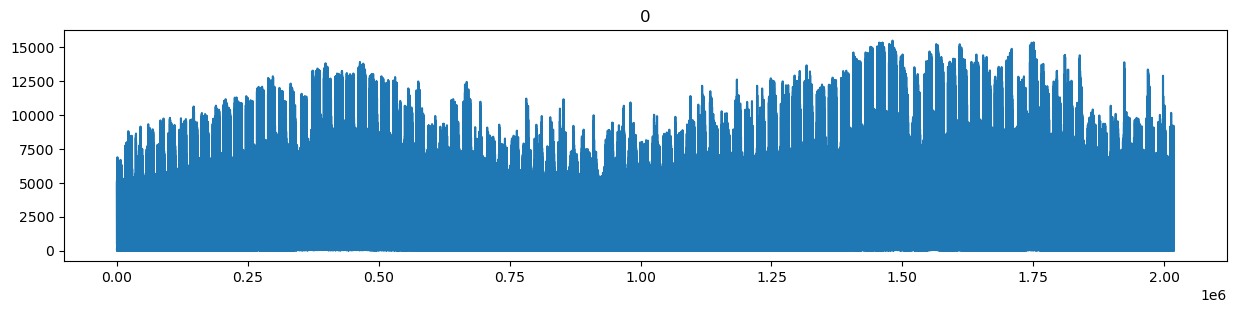

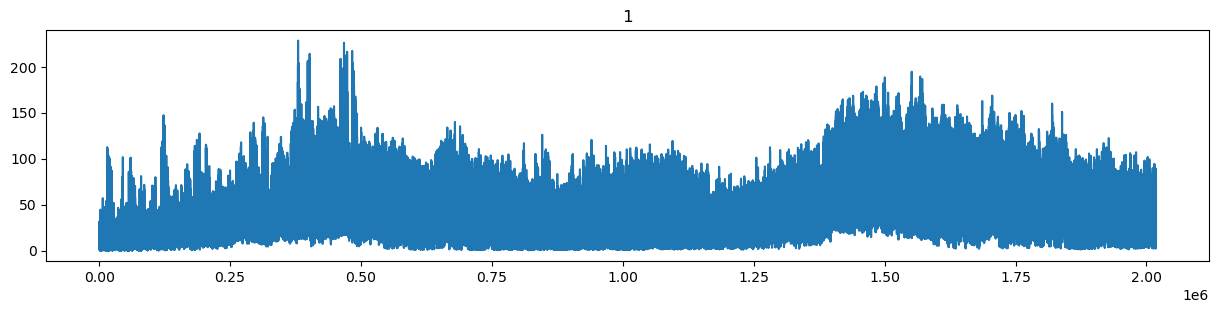

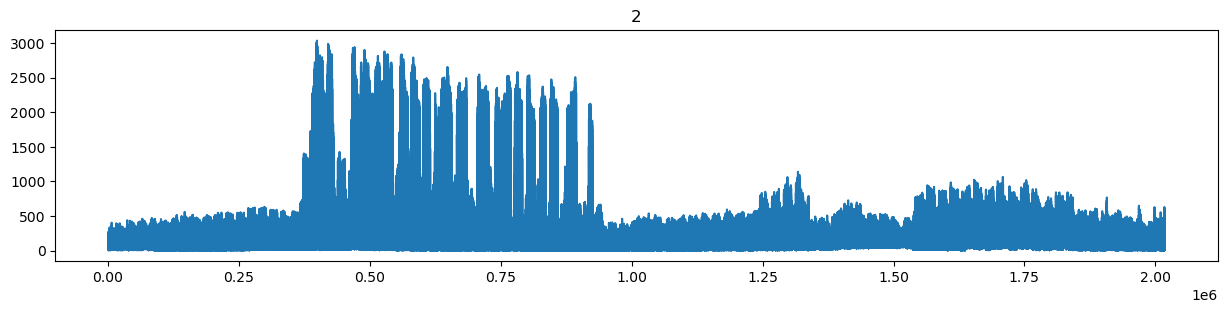

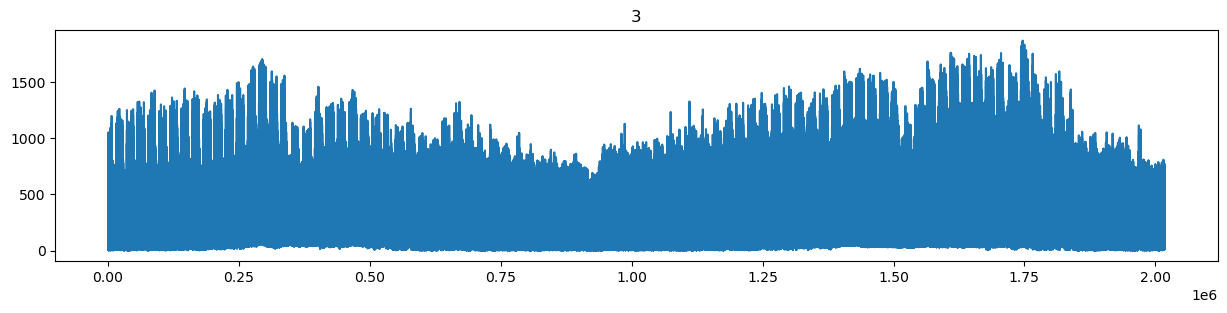

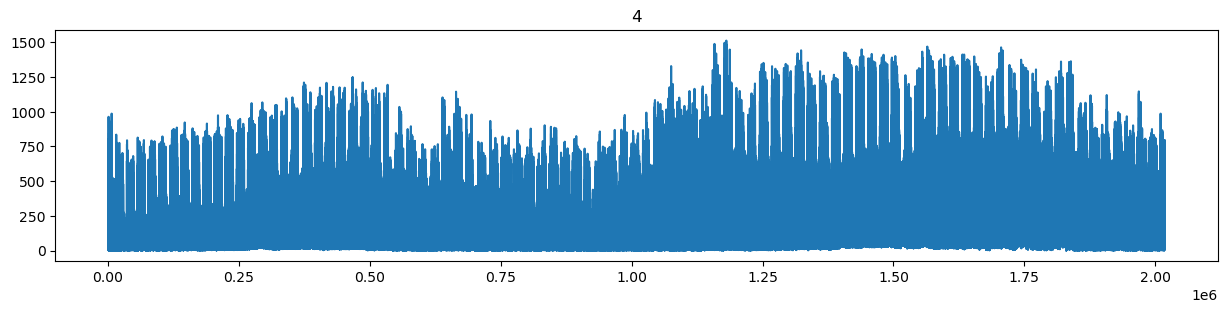

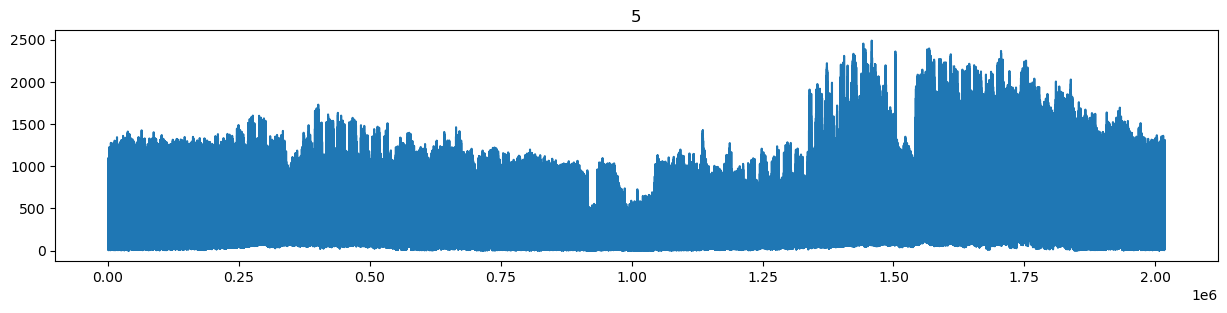

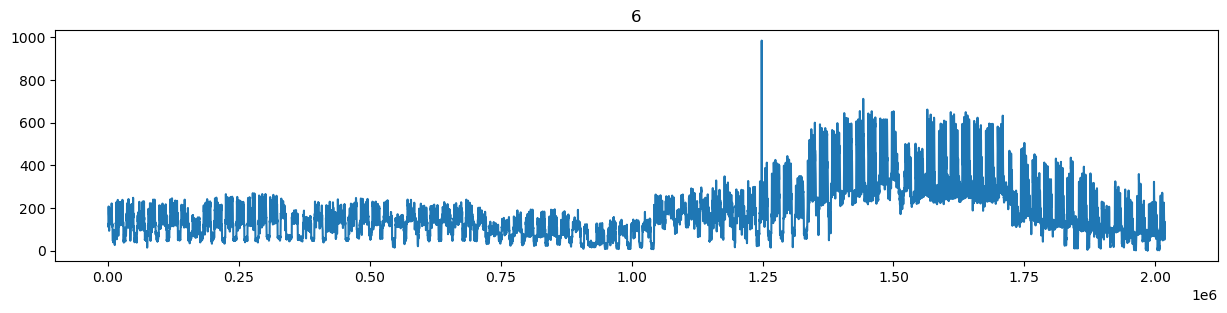

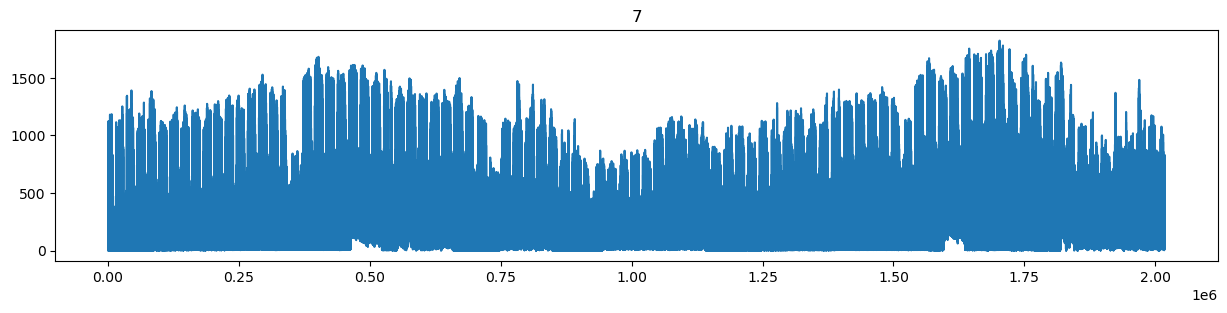

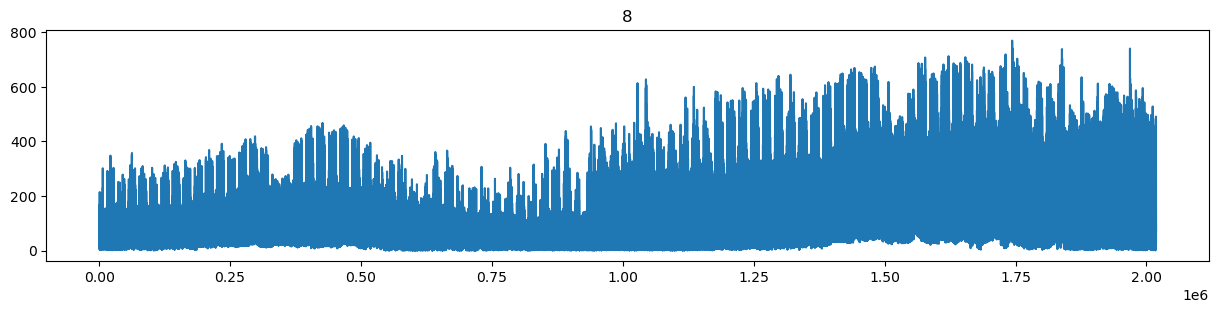

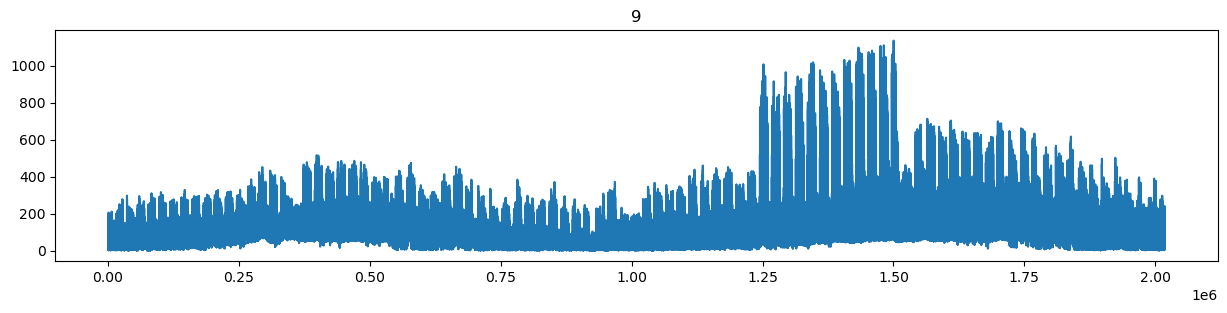

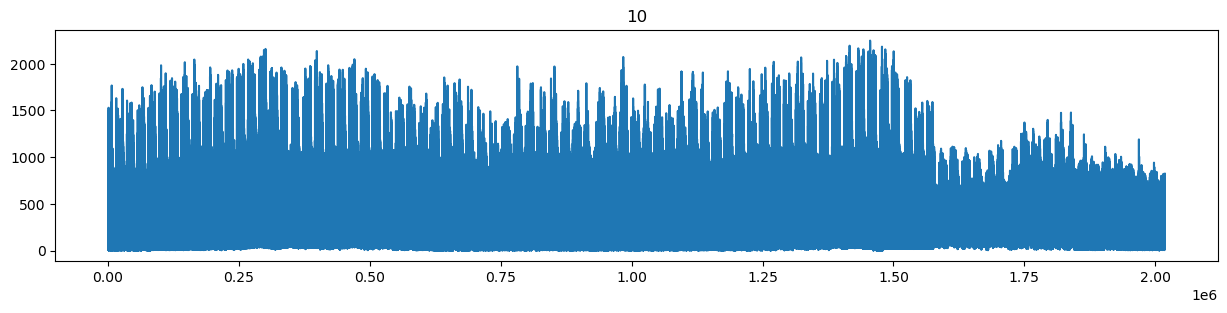

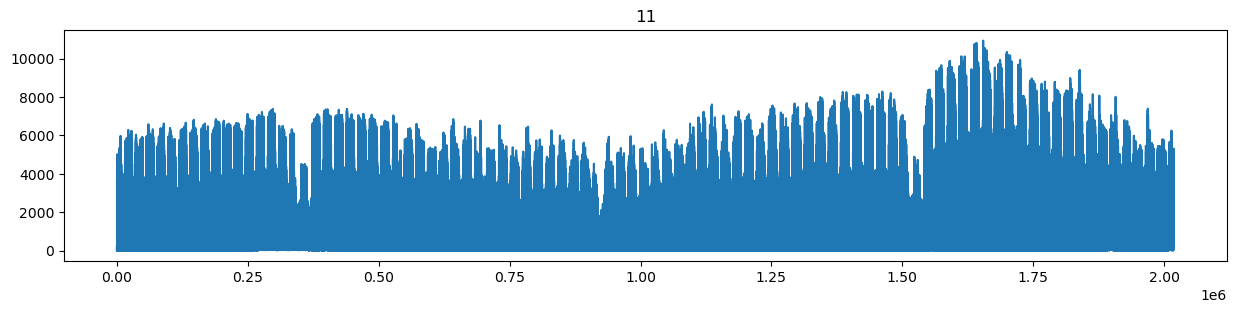

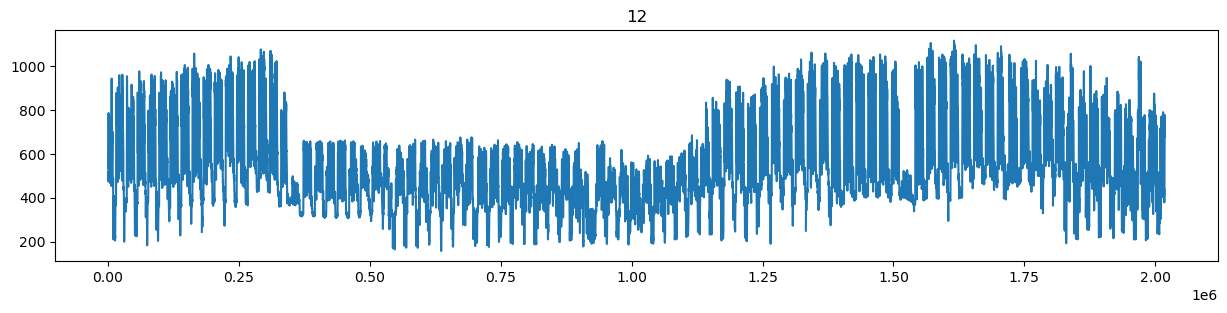

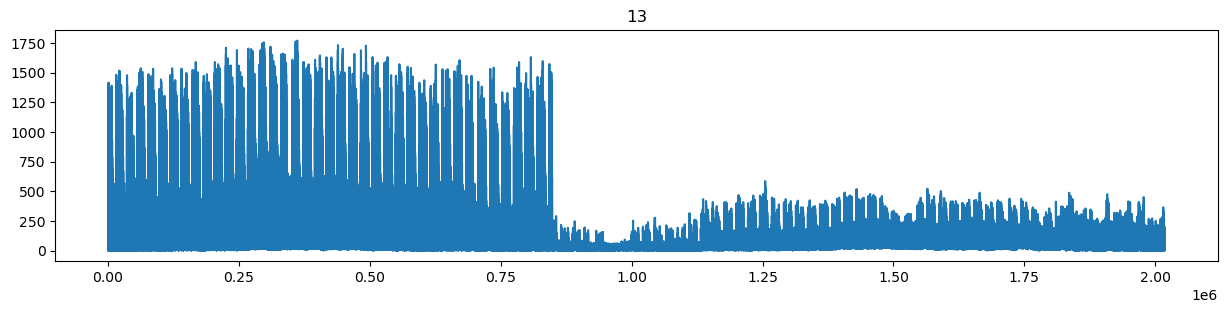

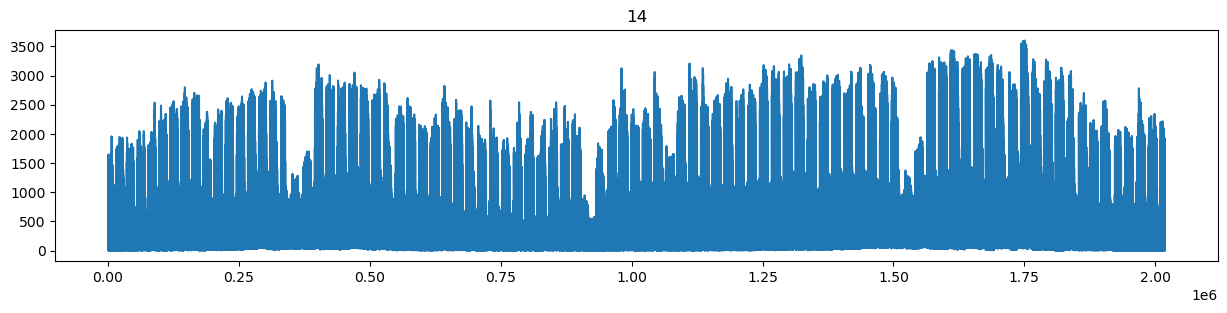

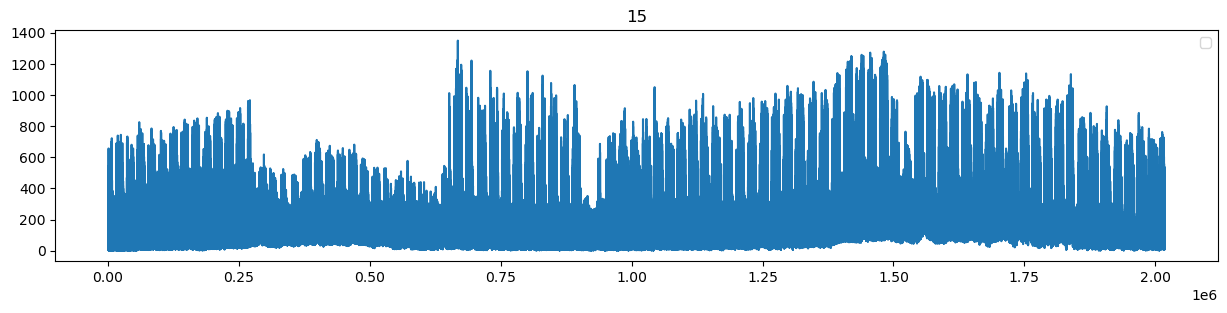

In [86]:
# county별로 살펴보기
df_consumption = df[df['is_consumption']==1]
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_consumption[df_consumption['county']==i]['target'])
    plt.title(i)
plt.legend()

- 이상치
    - county 6에서 2022년 10월

In [87]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_consumption[df_consumption['target']==0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
10133,0,1,0,0.0,1,2021-09-04 11:00:00,3,10133,3
10255,0,1,0,0.0,1,2021-09-04 12:00:00,3,10255,3
13183,0,1,0,0.0,1,2021-09-05 12:00:00,4,13183,3
13427,0,1,0,0.0,1,2021-09-05 14:00:00,4,13427,3
13549,0,1,0,0.0,1,2021-09-05 15:00:00,4,13549,3
...,...,...,...,...,...,...,...,...,...
2007443,0,1,2,0.0,1,2023-05-28 12:00:00,634,2007443,61
2007495,7,1,0,0.0,1,2023-05-28 12:00:00,634,2007495,28
2007625,7,1,0,0.0,1,2023-05-28 13:00:00,634,2007625,28
2007755,7,1,0,0.0,1,2023-05-28 14:00:00,634,2007755,28


- 여름: 생산량 ▲, 소비량 ▼
- 겨울: 생산량 ▼, 소비량 ▲

원인 추측

- 날씨적 요인 -> 태양열으로 생산 가능한 에너지 감소, 난방 사용 증가

- 여름에 자체적으로 생산 가능한 에너지 증가 -> 공급되는 전기 사용은 감소?